In [45]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [46]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [ ]:
NUM_CLASSES = 4

# Dataset reading

In [48]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [49]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [52]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_6 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,103 (4.31 KB)

 Trainable params: 1,103 (4.31 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# # Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [54]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [55]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


2026-01-17 10:24:42.518441: W tensorflow/core/framework/op_kernel.cc:1857] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of 3 which is outside the valid range of [0, 3).  Label values: 3 3 2 3 2 1 3 1 2 3 2 3 3 1 2 2 2 2 3 1 2 2 3 1 1 3 2 1 2 1 1 2 3 2 3 2 3 3 2 1 3 2 2 1 1 2 2 1 3 1 2 2 3 1


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 758, in start

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 211, in start

  File "/opt/anaconda3/lib/python3.12/asyncio/base_events.py", line 641, in run_forever

  File "/opt/anaconda3/lib/python3.12/asyncio/base_events.py", line 1986, in _run_once

  File "/opt/anaconda3/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 614, in shell_main

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_shell

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 366, in execute_request

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 827, in execute_request

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 458, in do_execute

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 663, in run_cell

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3123, in run_cell

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3178, in _run_cell

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3400, in run_cell_async

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3641, in run_ast_nodes

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3701, in run_code

  File "/var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/ipykernel_11067/2889966517.py", line 1, in <module>

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 399, in fit

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 241, in function

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 154, in multi_step_on_iterator

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 125, in wrapper

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 134, in one_step_on_data

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 62, in train_step

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/keras/src/trainers/trainer.py", line 383, in _compute_loss

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/keras/src/trainers/trainer.py", line 351, in compute_loss

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/keras/src/trainers/compile_utils.py", line 699, in __call__

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/keras/src/trainers/compile_utils.py", line 724, in call

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/keras/src/losses/loss.py", line 67, in __call__

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/keras/src/losses/losses.py", line 33, in call

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/keras/src/losses/losses.py", line 2330, in sparse_categorical_crossentropy

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/keras/src/ops/nn.py", line 2184, in sparse_categorical_crossentropy

  File "/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py", line 1250, in sparse_categorical_crossentropy

Received a label value of 3 which is outside the valid range of [0, 3).  Label values: 3 3 2 3 2 1 3 1 2 3 2 3 3 1 2 2 2 2 3 1 2 2 3 1 1 3 2 1 2 1 1 2 3 2 3 2 3 3 2 1 3 2 2 1 1 2 2 1 3 1 2 2 3 1
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_multi_step_on_iterator_35511]

In [ ]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.1864


In [ ]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[6.7795144e-04 8.6193419e-01 1.1548579e-01 2.1902062e-02]
1


# Confusion matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


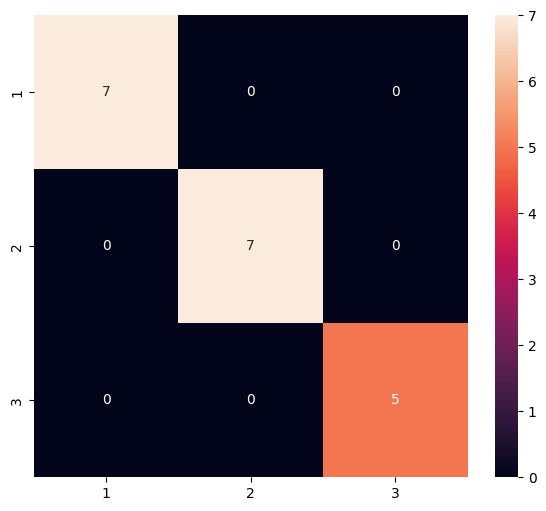

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         5

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [ ]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmpuffwjl6p/assets


INFO:tensorflow:Assets written to: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmpuffwjl6p/assets


Saved artifact at '/var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmpuffwjl6p'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  13024556432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13024557776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13051741200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13051741392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13051740432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13051741584: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1768670503.702282  381474 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1768670503.702320  381474 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2026-01-17 10:21:43.702503: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmpuffwjl6p
2026-01-17 10:21:43.702770: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2026-01-17 10:21:43.702774: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmpuffwjl6p
I0000 00:00:1768670503.704963  381474 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2026-01-17 10:21:43.705357: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2026-01-17 10:21:43.719702: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folder

6572

# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 82 μs, sys: 86 μs, total: 168 μs
Wall time: 91.8 μs


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.7795266e-04 8.6193419e-01 1.1548581e-01 2.1902068e-02]
1
